In [12]:
# IMPORTS
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [13]:
# Ui Introduction 
def intro():
    print("=== WWII Aircraft Radar Classifier ===")
    print("This tool is meant to determine whether a incoming aircraft are fighter or bombers in a WWII Radar Simulator.")
    print("The tool is based on aircraft characteristics from open source data.\n")


In [14]:
# Model Logic
# FEATURES: 
# Speed_km/h, Wingspan_m, Weight_kg, Engine Count

# LABELS:
# 0 = Fighter
# 1 = Bomber

# Test dataset based on wikipedia values [speed, wingspan, weight, engine count]
data = [
    [580, 11, 3200, 1],  # Fighter: P-51
    [560, 10, 2900, 1],  # Fighter: Spitfire
    [450, 22, 16000, 4],  # Bomber: B-17 
    [430, 28, 18000, 4],  # Bomber: Lancaster
    [600, 12, 3300, 1],  # Fighter: Fw 190
    [400, 31, 17000, 4],  # Bomber: He 177
]

labels = [0, 0, 1, 1, 0, 1]  # Fighter = 0, Bomber = 1

# get test and training sets
# 30% of data used for testing/ 70% used for training
features_train, features_test, labels_train, labels_test = train_test_split(
    data, labels, test_size=0.3, random_state=42
)


# create decision tree obj
clf = DecisionTreeClassifier()

# train the classifier on the training set
clf = clf.fit(features_train, labels_train)

# make predictions using the test data
predictions = clf.predict(features_test)

# check the accuracy
accuracy = metrics.accuracy_score(labels_test, predictions)


In [15]:
# funciton to create graph of decision tree for visualization
def visualize_tree():
    plt.figure(figsize=(16, 12), dpi=120)  # size of graph and resolution
    plt.rcParams["font.size"] = 10  # try to decrease tree font size
    plot_tree(
        clf,  # the classifier you trained earlier
        feature_names=["Speed", "Wingspan", "Weight", "Engines"],  # column labels
        class_names=["Fighter", "Bomber"],  # what 0 and 1 mean (labels)
        filled=True,  # color nodes
        rounded=True,
    )
    plt.title("Decision Tree for WWII Aircraft Classification", fontsize=14)
    plt.axis('off')
    plt.show()

=== WWII Aircraft Radar Classifier ===
This tool is meant to determine whether a incoming aircraft are fighter or bombers in a WWII Radar Simulator.
The tool is based on aircraft characteristics from open source data.

=== Model Training Complete ===
Test Accuracy: 100.00%

Try predicting a new plane...
Prediction:  Bomber


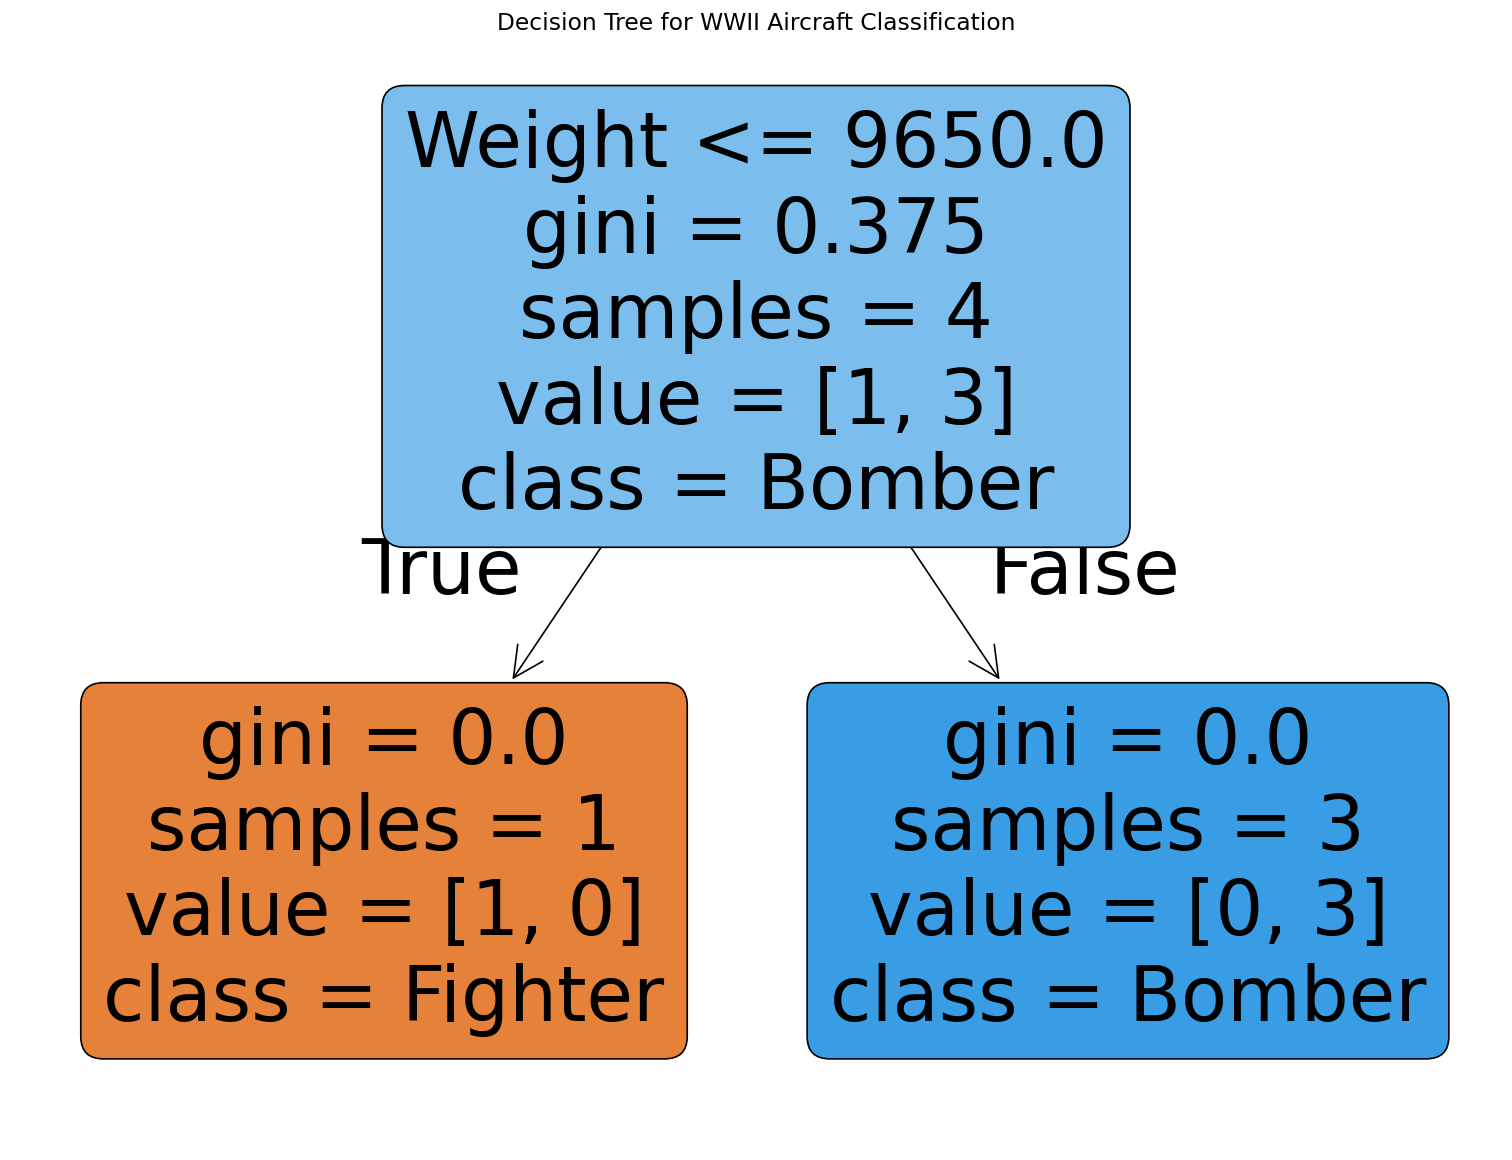

In [16]:
# main function
def main():
    intro()
    print("=== Model Training Complete ===")
    print(f"Test Accuracy: {accuracy * 100:.2f}%\n") # display the accuracy
    
    # Test on a new aircraft
    print("Try predicting a new plane...")
    new_plane = [440, 24, 15000, 4]  # random values (bomber)
    result = clf.predict([new_plane])
    print("Prediction: ", "Bomber" if result[0] == 1 else "Fighter")
    visualize_tree()

if __name__ == "__main__":
    main()